Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/DATA/cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [6]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


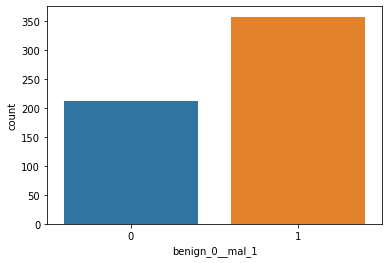

In [7]:
sns.countplot(x="benign_0__mal_1",data=df)

In [8]:
df.corr()["benign_0__mal_1"][:-1].sort_values() #son sütun kendisi olduğu için [:-1] yaptık

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

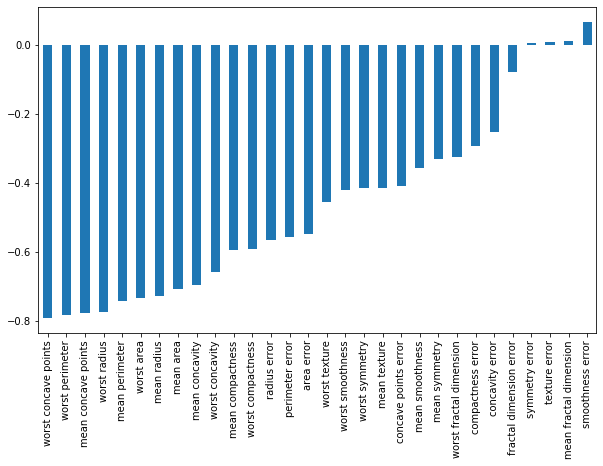

In [9]:
plt.figure(figsize=(10,6))
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind="bar")

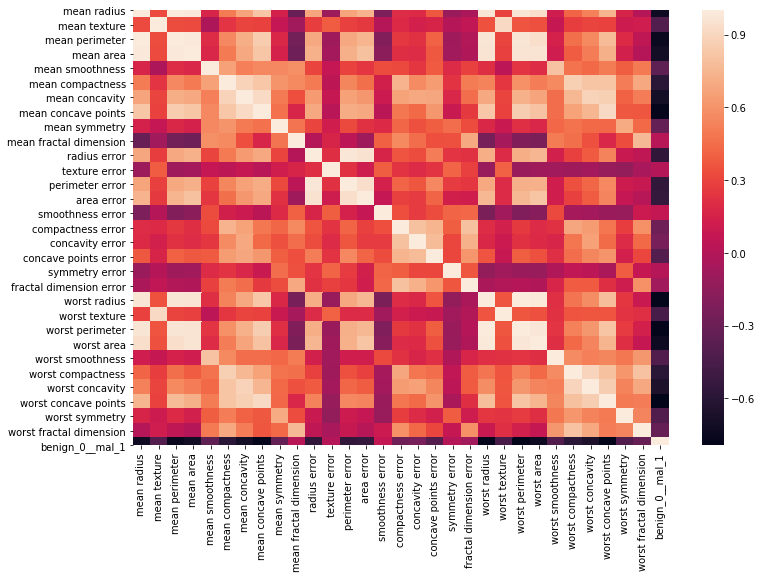

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop("benign_0__mal_1", axis=1).values
y=df["benign_0__mal_1"].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Dense,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
# modeli oluşturuyoruz


model = Sequential()

model.add(Dense(30,activation="relu"))

model.add(Dense(15,activation="relu"))

# binary classification problemlerinde son layer 
# yani output layerın aktivasyon fonksiyonu SİGMOİD seçilir.
model.add(Dense(1,activation="sigmoid"))

# binary crossentropy
model.compile(loss="binary_crossentropy",optimizer = "adam")

In [21]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))
#epoch değerini büyük seçtik ki overfittinge girdiğini görebilelim

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 5s 12ms/sample - loss: 0.6893 - val_loss: 0.6820
Epoch 2/600
426/426 [==============================] - 0s 568us/sample - loss: 0.6716 - val_loss: 0.6597
Epoch 3/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6461 - val_loss: 0.6360
Epoch 4/600
426/426 [==============================] - 0s 99us/sample - loss: 0.6184 - val_loss: 0.6055
Epoch 5/600
426/426 [==============================] - 0s 92us/sample - loss: 0.5822 - val_loss: 0.5636
Epoch 6/600
426/426 [==============================] - 0s 96us/sample - loss: 0.5358 - val_loss: 0.5126
Epoch 7/600
426/426 [==============================] - 0s 99us/sample - loss: 0.4876 - val_loss: 0.4594
Epoch 8/600
426/426 [==============================] - 0s 92us/sample - loss: 0.4388 - val_loss: 0.4079
Epoch 9/600
426/426 [==============================] - 0s 106us/sample - loss: 0.3960 - val_loss: 0.3664
Epoch 10/600
426

In [22]:
# loss değerlerini plotlayalım.

losses=pd.DataFrame(model.history.history)

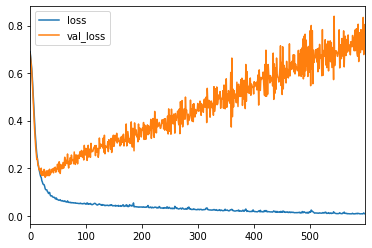

In [23]:
losses.plot()

**Overfitting** olduğunu görüyoruz. Onu da şuradan anlıyoruz; Validation loss değeri inerken normal losstan ayrılıp yukarı gitmeye başlarsa overfitting vardır deriz. Bunun en temel göstergelerinden birisi epochs değerinin çok yüksek olmasıdır.Her epochta giderek daha da yükseliyor.

Bunu düzeltmenin yolu early stoppingdir. Tensorflow sayesinde validation loss takip edilir ve bizim belirlediğimiz patience(tolerans) kadar sapmaya izin verilip durdurur.

In [24]:
# şimdi yeni model oluşturup early stopping deneyeceğiz.

model = Sequential()

model.add(Dense(30,activation="relu"))

model.add(Dense(15,activation="relu"))

# binary classification problemlerinde son layer 
# yani output layerın aktivasyon fonksiyonu SİGMOİD seçilir.
model.add(Dense(1,activation="sigmoid"))

# binary crossentropy
model.compile(loss="binary_crossentropy",optimizer = "adam")

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [27]:
early_stop=EarlyStopping(patience=25,verbose=1,monitor="val_loss",mode="min")

Early stopping : Over fittinge girmemesi için yaptığımız ayarla validation loss durumuna göre over fittinge girdiğini anlayıp erken kesen callbacktir. içeriğindeki 

monitor : izlenecek veridir. burada validation losstur.

min_delta : eşik değeridir. bunun altındaki hareketleri hareket yok olarak algılar.

patience : sapmaya izin verdiğimiz tolerans değeridir. Patience kadar daha epoch gider sonra keser. Örnek verirsek 20 yaparsak bunu, dönüş noktasını tespit ettikten sonra 20 epoch daha gider.

3tane mode seçeneği var bunlar min, max, auto. mode seçeneğine göre monitore davranışı değişir. Yani min seçtiysel monitör değeri minimuma ayarlanır ve azalmaya göre hareket eder yükseldiğinde keser, max yaparsak yükseliş yapmasına izin verilir ve azaldığı yerde keser. autoda ise genelde doğru çalışırı ve kendisi belirler fakat manuel seçmek daha iyidir.

Burada validation loss değerini minimize etmeye çalıştık.

In [28]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6950 - val_loss: 0.6494
Epoch 2/600
426/426 [==============================] - 0s 190us/sample - loss: 0.6429 - val_loss: 0.6106
Epoch 3/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6099 - val_loss: 0.5713
Epoch 4/600
426/426 [==============================] - 0s 120us/sample - loss: 0.5726 - val_loss: 0.5358
Epoch 5/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5339 - val_loss: 0.4929
Epoch 6/600
426/426 [==============================] - 0s 129us/sample - loss: 0.4939 - val_loss: 0.4523
Epoch 7/600
426/426 [==============================] - 0s 122us/sample - loss: 0.4548 - val_loss: 0.4126
Epoch 8/600
426/426 [==============================] - 0s 129us/sample - loss: 0.4184 - val_loss: 0.3741
Epoch 9/600
426/426 [==============================] - 0s 117us/sample - loss: 0.3826 - val_loss: 0.3497
Epoch 10/60

53. epochta earlystop tetiklendi ve durdu. Bu sayede epoch değerini çok büyük mü seçtik gibi endişeye gerek kalmıyor.

In [29]:
model_loss=pd.DataFrame(model.history.history)

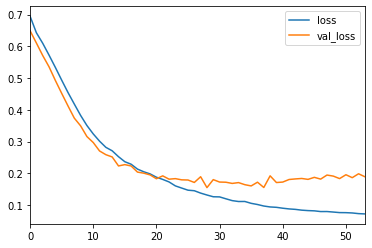

In [30]:
model_loss.plot()

Görüldüğü gibi dip noltadan itibaren 25 epoch daha yükselmesini izlemiş ve durmuş.

Overfittingi engellemenin diğer yolu da dropout layerdır.

**dropout layer:** overfittingi engellemenin diğer yoludur. Bir önceki batchte belirlediğimiz oranda nöronun w-b değerlerini körler  ve sonraki batche öylece gelmesini sağlar.

In [31]:
from tensorflow.keras.layers import Dropout

**NOTE:**
Dropout parametrelerinden;
rate: random belirlenecek ve körlenecek nöron oranı Eğer 0 yaparsak hiçbir nöronu körlemez. Eğer 1 yaparsak her batchin traininginde tüm nöronları körler. Yaygın olan 0.5 kullanılmasıdır. Bu durumda her batchte yüzde 50sini körler. Eğer batch size vermezsek tüm epochtaki nöronların yüzde 50si körlenir. Bu sayede bunların weight ve bias değerleri güncellenmez.


In [32]:
model = Sequential()

model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(15,activation="relu"))
model.add(Dropout(0.5))

# binary classification problemlerinde son layer 
# yani output layerın aktivasyon fonksiyonu SİGMOİD seçilir.
model.add(Dense(1,activation="sigmoid"))

# binary crossentropy
model.compile(loss="binary_crossentropy",optimizer = "adam")

In [33]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7003 - val_loss: 0.6849
Epoch 2/600
426/426 [==============================] - 0s 144us/sample - loss: 0.6797 - val_loss: 0.6664
Epoch 3/600
426/426 [==============================] - 0s 155us/sample - loss: 0.6622 - val_loss: 0.6514
Epoch 4/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6587 - val_loss: 0.6371
Epoch 5/600
426/426 [==============================] - 0s 120us/sample - loss: 0.6412 - val_loss: 0.6237
Epoch 6/600
426/426 [==============================] - 0s 380us/sample - loss: 0.6322 - val_loss: 0.6081
Epoch 7/600
426/426 [==============================] - 0s 252us/sample - loss: 0.6290 - val_loss: 0.5957
Epoch 8/600
426/426 [==============================] - 0s 137us/sample - loss: 0.5992 - val_loss: 0.5813
Epoch 9/600
426/426 [==============================] - 0s 151us/sample - loss: 0.6039 - val_loss: 0.5648
Epoch 10/60

In [34]:
model_loss=pd.DataFrame(model.history.history)

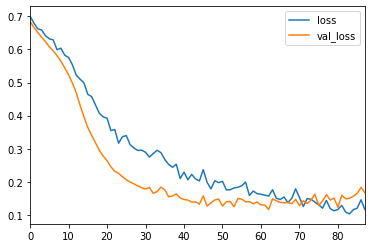

In [35]:
model_loss.plot()

Bu süper bir sonuç oldu çünkü her iki loss değeri de hızla aşağı indi ve aynı oranda düzleşmeye başladı. Bu bizim görmek istediğimiz durum.

In [36]:
model.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [37]:
predictions = model.predict_classes(X_test)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91        55
           1       0.99      0.89      0.93        88

    accuracy                           0.92       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143



In [40]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [10 78]]


Sonuçlar çok iyi çıktı.Tüm datasetinde 7 yanlış çıktı.